# Star shaped qubit

We'll be creating a 2D design and adding a star shaped qubit QComponent.


There's a central star shaped component. This component is essentially a circle with trpezoids subtracted from it. A T-junction qubit is attached to this central shape. Then there are four coupling resonators and one readout resonator present in the default setting. The shape of the central component and the number coupling resonators are customizable. Let's try out a few diferent ways to create and render this component.

In [1]:
# So, let us dive right in. For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

Next, we import the relevant modules. You can add new modules as and when needed. 

In [2]:
import qiskit_metal as metal
import numpy as np
from math import *
from qiskit_metal import designs, draw, Dict
from qiskit_metal.qlibrary.core import BaseQubit, QComponent

Next we import the GUI

In [3]:
from qiskit_metal import MetalGUI

A QDesign class must be instantiated each time a new quantum circuit design is created. The design class `DesignPlanar` is best for 2D circuit designs.

In [4]:
design = designs.DesignPlanar()
gui = MetalGUI(design)
gui.rebuild() 

# A Star Qubit

You can create a ready-made star qubit from the QComponent Library, qiskit_metal.qlibrary.qubits. star_qubit.py is the file containing our qubit so StarQubit is the module we import. 


In [5]:
from qiskit_metal.qlibrary.qubits.star_qubit import StarQubit

In [6]:
# The following default_options can be overridden by user.
StarQubit.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'radius': '300um',
 'center_radius': '100um',
 'gap_couplers': '25um',
 'gap_readout': '10um',
 'connector_length': '75um',
 'trap_offset': '20um',
 'junc_h': '100um',
 'cpw_width': '0.01',
 'rotation_cpl1': '0.0',
 'rotation_cpl2': '72.0',
 'rotation_rdout': '144.0',
 'rotation_cpl3': '216.0',
 'rotation_cpl4': '288.0',
 'number_of_connectors': '4',
 'resolution': '16',
 'cap_style': 'round',
 'subtract': 'False',
 'helper': 'False',
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [7]:
# To force overwrite a QComponent with an existing name.  
# This is useful when re-running cells in a notebook. 
design.overwrite_enabled = True

Let us place the qubit at (x,y) =(5,5), and change the default rotation values. As this design is meant to have up to 5 contacts including one readout and up to 4 coupling resonators, these angles should be 72 degrees apart. However, the number of connectors may be changed to any value between 0 and 4.

In [8]:
qubit_options = dict(
    pos_x = '7um',
    pos_y = '7um',  
    number_of_connectors = 4 # Change the number of connectors
)

# Create a new Concentric Transmon object with name 'Q1' 
q1 = StarQubit(design, 'Star', options=qubit_options)

gui.rebuild()  # rebuild the design and plot 
gui.autoscale() #resize GUI to see QComponent
gui.zoom_on_components(['Star']) #Can also gui.zoom_on_components([q1.name])

In [9]:
#Let's see what the Q1 object looks like

q1 #print Q1 information

name:    Star
class:   StarQubit             
options: 
  'pos_x'             : '7um',                        
  'pos_y'             : '7um',                        
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'radius'            : '300um',                      
  'center_radius'     : '100um',                      
  'gap_couplers'      : '25um',                       
  'gap_readout'       : '10um',                       
  'connector_length'  : '75um',                       
  'trap_offset'       : '20um',                       
  'junc_h'            : '100um',                      
  'cpw_width'         : '0.01',                       
  'rotation_cpl1'     : '0.0',                        
  'rotation_cpl2'     : '72.0',                       
  'rotation_rdout'    : '144.0',                      
  'rotation_cpl3'     : '216.0',                      
  'rotati

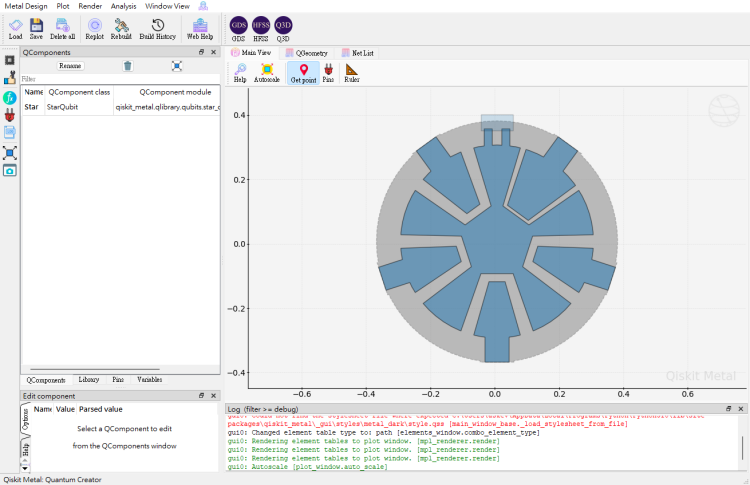

In [10]:
#Save screenshot as a .png formatted file.
gui.screenshot()

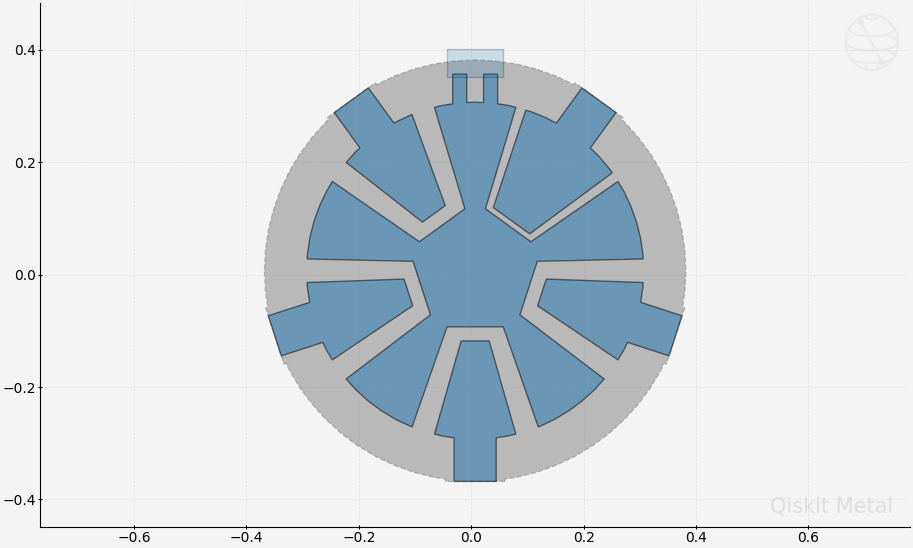

In [11]:
# Screenshot the canvas only as a .png formatted file.
gui.figure.savefig('shot.png')

from IPython.display import Image, display
_disp_ops = dict(width=500)
display(Image('shot.png', **_disp_ops))

# Closing the Qiskit Metal GUI

In [12]:
# gui.main_window.close()